# Preprocessing dataset

In [1]:
import os
import json
import ast

import pandas as pd
import numpy as np

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', None)

---

### Configuration

In [4]:
df = pd.read_csv("games.csv")

In [5]:
df.describe()

,AppID,Peak CCU,Required age,Price,DLC count,Metacritic score,User score,Positive,Negative,Score rank,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,85103.000000,8.510300e+04,85103.000000,44.000000,85103.000000,8.510300e+04,85103.000000,85103.000000,85103.000000,85103.000000
mean,1.355681e+06,134.872930,0.312774,7.193703,0.543412,3.348366,0.039822,9.585609e+02,159.772570,98.909091,19.859394,7.755176e+02,104.729681,10.680105,93.316029,11.467328
std,6.949952e+05,5403.548851,2.254721,12.362478,13.721223,15.421471,1.791013,2.435920e+04,4574.583903,0.857747,171.446874,1.789338e+04,1142.447517,188.840006,1510.732101,205.372944
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,97.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,7.723900e+05,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,98.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,1.331540e+06,0.000000,0.000000,4.490000,0.000000,0.000000,0.000000,7.000000e+00,2.000000,99.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,1.918415e+06,1.000000,0.000000,9.990000,0.000000,0.000000,0.000000,4.500000e+01,14.000000,100.000000,18.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,2.765800e+06,872138.000000,21.000000,999.980000,2366.000000,97.000000,100.000000,5.764420e+06,895978.000000,100.000000,9821.000000,3.441592e+06,145727.000000,19159.000000,208473.000000,19159.000000


In [6]:
df.sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
5426,1133640,Boom 3D Mac,"Oct 4, 2019",0 - 20000,0,0,19.99,0,Boom 3D is an innovative audio enhancement app...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://www.globaldelight.com/boom/help/mac,boom3@globaldelight.com,False,True,False,0,NaN,0,2,2,NaN,0,0,NaN,0,0,0,0,Global Delight Technologies Pvt. Ltd.,Global Delight Technologies Pvt. Ltd.,NaN,"Audio Production,Utilities","Utilities,Audio Production",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
63191,2109660,Beam Splitter,"Aug 29, 2022",0 - 20000,0,0,2.99,0,Beam Splitter is an endless arcade style game....,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://spacevaultgames.com,andrew@spacevaultgames.com,True,True,False,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Andrew Hess,Andrew Hess,Single-player,"Casual,Indie,Strategy","Strategy,Casual,Arcade,Relaxing,Minimalist,Puz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
29509,694230,Martha Madison: Energy,"Feb 8, 2018",0 - 20000,0,0,1.99,0,"In Martha Madison: Energy , Martha needs your ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.secondavenuelearning.com/products/m...,NaN,support@secondavenuelearning.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Second Avenue Learning,Second Avenue Learning,"Single-player,Multi-player,Co-op,Shared/Split ...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
58156,713450,Dungeon Rustlers,"Mar 21, 2018",0 - 20000,0,0,4.99,0,Collect loot. Kill Monsters. Do it Quickly. Oh...,['English'],['English'],“The mix of an epic dungeon crawler and retro-...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://dungeonrustlers.com,http://dungeonrustlers.com/support,support@zimventures.com,True,False,False,0,NaN,0,11,2,NaN,20,0,NaN,0,0,0,0,"Zimventures, LLC","Zimventures, LLC","Single-player,Steam Achievements,Partial Contr...",Action,"Action,Shoot 'Em Up",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
78956,2456010,鲨鱼周末 Playtest,"Oct 30, 2023",0 - 0,0,0,0.00,0,NaN,[],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN


In [7]:
df.columns

Index(['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU',
       'Required age', 'Price', 'DLC count', 'About the game',
       'Supported languages', 'Full audio languages', 'Reviews',
       'Header image', 'Website', 'Support url', 'Support email', 'Windows',
       'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score',
       'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations',
       'Notes', 'Average playtime forever', 'Average playtime two weeks',
       'Median playtime forever', 'Median playtime two weeks', 'Developers',
       'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies'],
      dtype='object')

---

### Fixing data types

In [8]:
df.dtypes

AppID                           int64
Name                           object
Release date                   object
Estimated owners               object
Peak CCU                        int64
Required age                    int64
Price                         float64
DLC count                       int64
About the game                 object
Supported languages            object
Full audio languages           object
Reviews                        object
Header image                   object
Website                        object
Support url                    object
Support email                  object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
Metacritic url                 object
User score                      int64
Positive                        int64
Negative                        int64
Score rank                    float64
Achievements                    int64
Recommendati

In [9]:
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return []

df['Release date'] = pd.to_datetime(df['Release date'], format='mixed')
df['Supported languages'] = df['Supported languages'].apply(safe_literal_eval)
df['Full audio languages'] = df['Full audio languages'].apply(safe_literal_eval)
df['Genres'] = df['Genres'].str.split(',')
df['Tags'] = df['Tags'].str.split(',')
df['Estimated owners'] = df['Estimated owners'].apply(lambda x: tuple(map(int, x.split(' - '))))
df = df.drop(columns=['Header image', 'Website', 'Support url', 'Support email', 'Screenshots', 'Movies'])

In [10]:
df.dtypes

AppID                                  int64
Name                                  object
Release date                  datetime64[ns]
Estimated owners                      object
Peak CCU                               int64
Required age                           int64
Price                                float64
DLC count                              int64
About the game                        object
Supported languages                   object
Full audio languages                  object
Reviews                               object
Windows                                 bool
Mac                                     bool
Linux                                   bool
Metacritic score                       int64
Metacritic url                        object
User score                             int64
Positive                               int64
Negative                               int64
Score rank                           float64
Achievements                           int64
Recommenda

### Cleaning the data

Let's look at the missing values in the dataframe.

In [11]:
df.isna().sum()

AppID                             0
Name                              6
Release date                      0
Estimated owners                  0
Peak CCU                          0
Required age                      0
Price                             0
DLC count                         0
About the game                 3567
Supported languages               0
Full audio languages              0
Reviews                       75360
Windows                           0
Mac                               0
Linux                             0
Metacritic score                  0
Metacritic url                81191
User score                        0
Positive                          0
Negative                          0
Score rank                    85059
Achievements                      0
Recommendations                   0
Notes                         72082
Average playtime forever          0
Average playtime two weeks        0
Median playtime forever           0
Median playtime two weeks   

It seems like metacritic's information and score ranks are almost useless, since they are missing in almost all of the data entries. Hence, we can delete them. However, other missing values are pretty rare, so we shouldn't delete the entire columns.

In [12]:
df[df['Developers'].isna()].sample(5)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
68681,2282450,Laysara: Summit Kingdom Playtest,2023-01-19,"(0, 0)",0,0,0.00,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
4542,855060,Huawei VR 2,2018-05-01,"(0, 0)",0,0,0.00,0,Huawei VR 2 is the first product which can acc...,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
62584,2111880,Ultimechs Pre-Season Preview - Aug. 25-28,2022-08-16,"(0, 0)",0,0,0.00,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
65326,2155120,Undisputed Online Beta,2022-10-28,"(0, 0)",0,0,0.00,0,NaN,[],[],NaN,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN
31070,211203,Phantasy Star II,2012-05-02,"(0, 0)",0,0,0.99,0,"Moto, a once peaceful tropical paradise and th...",[English],[],NaN,True,True,True,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,NaN,SEGA,Single-player,NaN,NaN


It's easy to see that the games with missing values in columns like `Developers` or `Publishers` are outliers and can be deleted from the dataset.

In [13]:
df = df.drop(columns=['Metacritic score', 'Metacritic url', 'Score rank'])
df = df.drop(df.loc[(df['About the game'].isna()) | (df['Developers'].isna()) | (df['Publishers'].isna()) | (df['Categories'].isna()) | (df['Genres'].isna())].index)
df['Reviews'] = df['Reviews'].fillna('')
df['Notes'] = df['Notes'].fillna('')
df.loc[df['Tags'].isnull(), 'Tags'] = df.loc[df['Tags'].isnull(), 'Tags'].apply(lambda x: [])

In [14]:
df.isna().sum()

AppID                         0
Name                          0
Release date                  0
Estimated owners              0
Peak CCU                      0
Required age                  0
Price                         0
DLC count                     0
About the game                0
Supported languages           0
Full audio languages          0
Reviews                       0
Windows                       0
Mac                           0
Linux                         0
User score                    0
Positive                      0
Negative                      0
Achievements                  0
Recommendations               0
Notes                         0
Average playtime forever      0
Average playtime two weeks    0
Median playtime forever       0
Median playtime two weeks     0
Developers                    0
Publishers                    0
Categories                    0
Genres                        0
Tags                          0
dtype: int64

Let's see what games have 0 reviews and 0 playtime.

In [15]:
df[(df['Positive'] + df['Negative'] == 0) & (df['Average playtime forever'] == 0.0)].describe()

,AppID,Release date,Peak CCU,Required age,Price,DLC count,User score,Positive,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks
count,1.703000e+04,17030,17030.000000,17030.000000,17030.000000,17030.000000,17030.0,17030.0,17030.0,17030.000000,17030.000000,17030.0,17030.0,17030.0,17030.0
mean,1.994592e+06,2022-07-25 04:56:42.560187648,2.008984,0.177921,5.532585,0.189372,0.0,0.0,0.0,7.770523,10.280505,0.0,0.0,0.0,0.0
min,1.620000e+03,2006-07-06 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1.716742e+06,2022-01-28 00:00:00,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,2.096350e+06,2022-11-29 00:00:00,0.000000,0.000000,2.520000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,2.343248e+06,2023-06-10 00:00:00,0.000000,0.000000,6.490000,0.000000,0.0,0.0,0.0,9.000000,0.000000,0.0,0.0,0.0,0.0
max,2.749500e+06,2025-04-14 00:00:00,1895.000000,21.000000,999.980000,101.000000,0.0,0.0,0.0,426.000000,26842.000000,0.0,0.0,0.0,0.0
std,4.708239e+05,NaN,35.344155,1.743370,16.609397,1.770732,0.0,0.0,0.0,17.805955,377.640855,0.0,0.0,0.0,0.0


This means that we can safely delete all games with no user reviews and $0$ played time, since no one has ever played them.

In [16]:
df = df.drop(df.loc[(df['Positive'] + df['Negative'] == 0) & (df['Average playtime forever'] == 0.0)].index)

Let's look at the most expensive games.

In [17]:
df[df['Price'] >= 200]

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,Full audio languages,Reviews,Windows,Mac,Linux,User score,Positive,Negative,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags
26936,1200520,Ascent Free-Roaming VR Experience,2019-12-27,"(0, 20000)",0,0,999.00,0,The Ascent is a Free-Roaming highly immersive ...,[English],[English],,True,False,False,0,6,0,0,0,,0,0,0,0,Fury Games,Fury Games,"Single-player,Multi-player,Co-op,LAN Co-op",[Action],"[Action, VR, Free to Play, Multiplayer, Arena ..."
32110,502570,Houdini Indie,2018-10-10,"(0, 20000)",59,0,269.99,0,As an indie game dev you are faced with the ch...,[English],[],,True,True,False,0,141,7,0,124,,0,0,0,0,SideFX,SideFX,"Partial Controller Support,Steam Cloud","[Animation & Modeling, Design & Illustration, ...","[Animation & Modeling, Game Development, 3D, D..."
57689,253670,Aartform Curvy 3D 3.0,2013-11-12,"(0, 20000)",0,0,299.90,0,Curvy 3D 3.0 is an innovative sculpting progra...,[English],[],,True,False,False,0,32,13,0,0,,150,0,150,0,Aartform,Aartform,Single-player,[Animation & Modeling],[Animation & Modeling]


There are three games with price at least $200, two of which are video editing tools, while the last one is a VR game. By researching the VR game on Steam, it is obvious that the game's price is a scam, since the game itself is poorly designed and developed. Thus, we should delete this game.

In [18]:
df = df.drop(df.loc[df['Price'] >= 990].index)

In [19]:
df['Min owners'] = df['Estimated owners'].apply(lambda x: x[0])
df['Max owners'] = df['Estimated owners'].apply(lambda x: x[1])
df['Mean owners'] = (df['Min owners'] + df['Max owners']) / 2

---

# Features' distributions

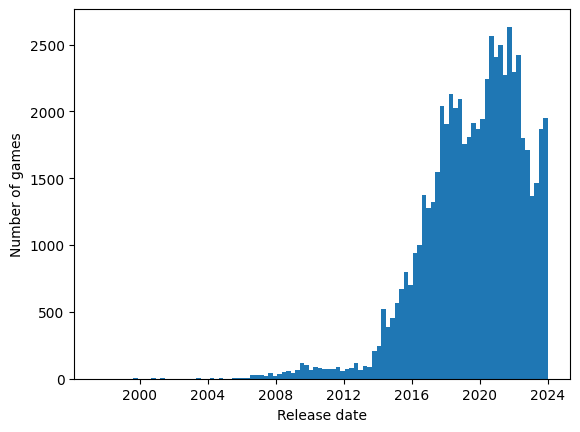

In [20]:
plt.hist(df['Release date'], bins=100)
plt.xlabel('Release date')
plt.ylabel('Number of games')
plt.show()

Interstingly, the peak of the number of games released occurs during the Covid lockdown, which is reasonable, since people were spending most of their time at home, which meant that they have more time to spare at their computers, especially playing video games. This boosted demand in video games market and led to an increase in the number of games developed and released in that period.

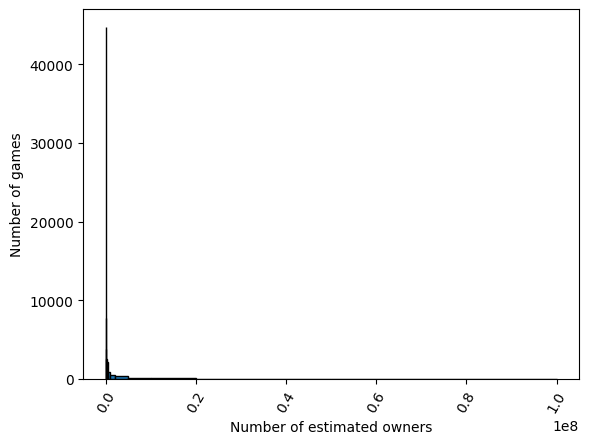

In [21]:
est_own_bins = [x[0] for x in df['Estimated owners'].unique()]

est_own_bins.sort()

plt.hist(df['Mean owners'], bins=est_own_bins, edgecolor='black')
plt.xticks(rotation=60)
plt.xlabel('Number of estimated owners')
plt.ylabel('Number of games')
plt.show()

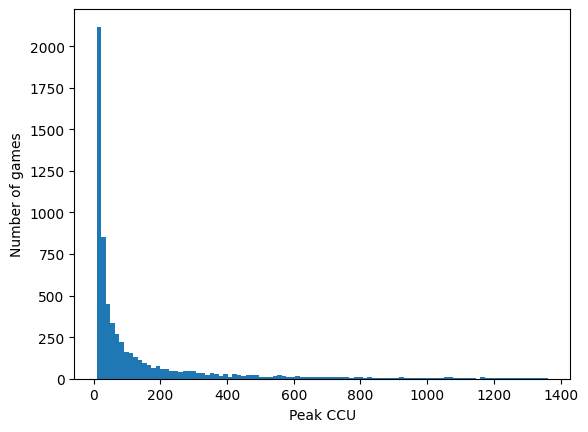

In [22]:
lower_bound = 10
upper_bound = df['Peak CCU'].quantile(0.99)

plt.hist(df[(df['Peak CCU'] >= lower_bound) & (df['Peak CCU'] <= upper_bound)]['Peak CCU'], bins=100)
plt.xlabel('Peak CCU')
plt.ylabel('Number of games')
plt.show()

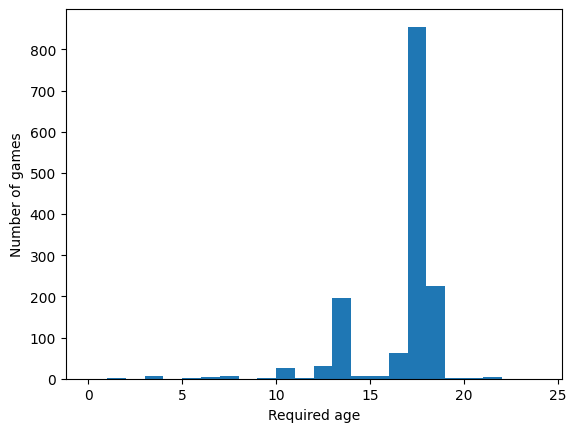

In [23]:
plt.hist(df[df['Required age'] >= 1]['Required age'], bins=list(range(0, 25)))
plt.xlabel('Required age')
plt.ylabel('Number of games')
plt.show()

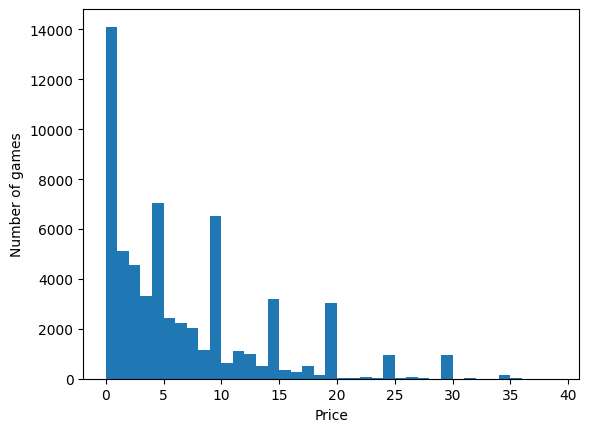

In [24]:
plt.hist(df['Price'], bins=list(range(0, 40)))
plt.xlabel('Price')
plt.ylabel('Number of games')
plt.show()

As we can see, most popular prices are of the form 4.99 or 19.99, because it is a well known marketing trick.

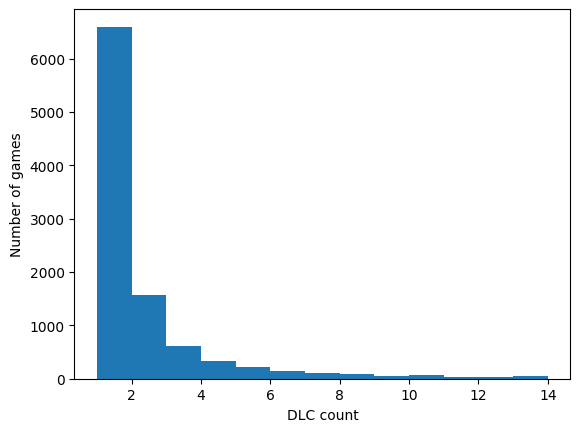

In [25]:
plt.hist(df['DLC count'], bins=range(1, 15))
plt.xlabel('DLC count')
plt.ylabel('Number of games')
plt.show()

In [26]:
df['About the game']

0        Galactic Bowling is an exaggerated and stylize...
1        THE LAW!! Looks to be a showdown atop a train....
3        HENOSIS™ is a mysterious 2D Platform Puzzler w...
4        ABOUT THE GAME Play as a hacker who has arrang...
5        Feel tired of auto-fight? Feel tired of boring...
                               ...                        
85077    Ant Farm (formicarium) With A Colony Of Ants. ...
85079    In the once tranquil village of Holyburn, Main...
85083    《Digital Girlfriend》 is a nurturing game of su...
85085    A horror game about a hicker who found himself...
85094    Tower Defense: Cats are towers, ghosts are ene...
Name: About the game, Length: 62827, dtype: object

Let's look at the most supported languages.

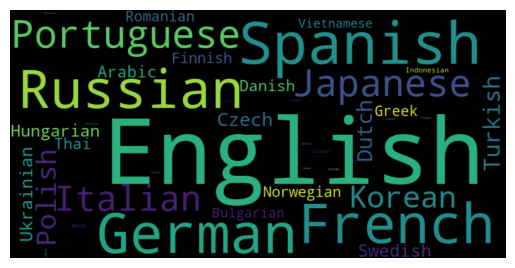

In [27]:
all_languages = [lang for sublist in df['Supported languages'] for lang in sublist]

all_languages = [x.split(' - ')[0] for x in all_languages]

all_languages = [x for x in all_languages if x.isalpha()]

word_counts = {}
for word in all_languages:
    word_counts[word] = word_counts.get(word, 0) + 1

wordcloud = WordCloud(width=800, height=400, background_color='black')
wordcloud.generate_from_frequencies(word_counts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---